In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
from random import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

Dataset from [Kaggle](https://www.kaggle.com/tongpython/cat-and-dog)

In [2]:
train_cat = glob.glob("C:/Kaggle/Dogs_vs_Cats/training_set/cats/*.*")
train_dog = glob.glob("C:/Kaggle/Dogs_vs_Cats/training_set/dogs/*.*")
train_images = train_cat + train_dog
train_images[0:5]

['C:/Kaggle/Dogs_vs_Cats/training_set/cats\\cat.1.jpg',
 'C:/Kaggle/Dogs_vs_Cats/training_set/cats\\cat.10.jpg',
 'C:/Kaggle/Dogs_vs_Cats/training_set/cats\\cat.100.jpg',
 'C:/Kaggle/Dogs_vs_Cats/training_set/cats\\cat.1000.jpg',
 'C:/Kaggle/Dogs_vs_Cats/training_set/cats\\cat.1001.jpg']

In [3]:
test_cat = glob.glob("C:/Kaggle/Dogs_vs_Cats/test_set/cats/*.*")
test_dog = glob.glob("C:/Kaggle/Dogs_vs_Cats/test_set/dogs/*.*")
test_images = test_cat + test_dog
test_images[0:5]

['C:/Kaggle/Dogs_vs_Cats/test_set/cats\\cat.4001.jpg',
 'C:/Kaggle/Dogs_vs_Cats/test_set/cats\\cat.4002.jpg',
 'C:/Kaggle/Dogs_vs_Cats/test_set/cats\\cat.4003.jpg',
 'C:/Kaggle/Dogs_vs_Cats/test_set/cats\\cat.4004.jpg',
 'C:/Kaggle/Dogs_vs_Cats/test_set/cats\\cat.4005.jpg']

In [4]:
def image_label(file):
    if "cat" in file:
        return 0
    elif "dog" in file:
        return 1

In [5]:
training_data = []
for file in train_images:
    label = image_label(file)
    img = cv2.imread(file)
    img = cv2.resize(img, (256, 256))
    
    training_data.append([np.array(img), np.array(label)])
shuffle(training_data)

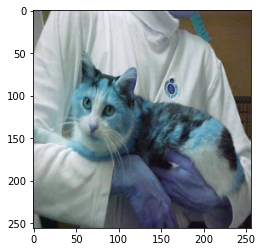

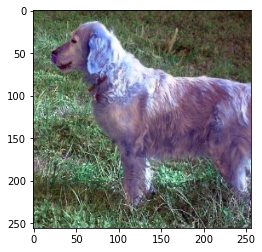

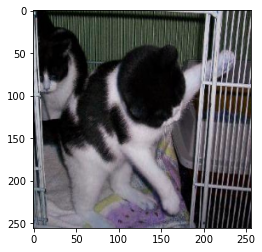

In [6]:
for i in [1, 50, 500]:
    plt.imshow(training_data[i][0])
    plt.show()

In [7]:
train = training_data[:-1000]
val = training_data[-1000:]

In [8]:
dogs_train = 0
cats_train = 0
dogs_val = 0
cats_val = 0
for i in train:
    classes = i[1]
    if classes == 1:
        dogs_train += 1
    else:
        cats_train += 1
for i in val:
    classes = i[1]
    if classes == 1:
        dogs_val += 1
    else:
        cats_val += 1

print(f"There are {dogs_train} dogs and {cats_train} cats in the training set. \nThere are {dogs_val} dogs and {cats_val} cats in the validation set.")

There are 3526 dogs and 3479 cats in the training set. 
There are 479 dogs and 521 cats in the validation set.


In [9]:
X_train = np.array([i[0] for i in train]).reshape(-1, 256, 256, 3)
y_train = np.array([i[1] for i in train])

X_val = np.array([i[0] for i in val]).reshape(-1, 256, 256, 3)
y_val = np.array([i[1] for i in val])

In [10]:
testing_data = []
num = 1
for file in test_images:
    label = image_label(file)
    img = cv2.imread(file)
    img = cv2.resize(img, (256, 256))
    
    testing_data.append([np.array(img), np.array(label)])
    num += 1
shuffle(testing_data)

In [11]:
X_test = np.array([i[0] for i in testing_data]).reshape(-1, 256, 256, 3)
y_test = np.array([i[1] for i in testing_data])

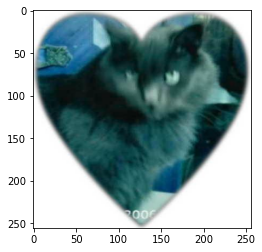

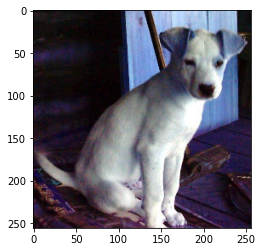

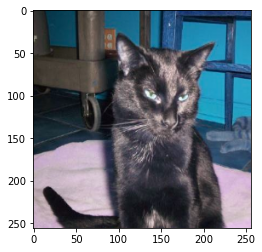

In [12]:
for i in [1, 250, 500]:
    plt.imshow(testing_data[i][0])
    plt.show()

In [13]:
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [14]:
model = keras.Sequential([
    layers.InputLayer([256, 256, 3]),
    
    preprocessing.RandomFlip(mode = "horizontal"),
    preprocessing.RandomRotation(factor = 0.25),   
    
    layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu", padding = "same"),
    layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu", padding = "same"),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu", padding = "same"),
    layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu", padding = "same"),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters = 128, kernel_size = 3, activation = "relu", padding = "same"),
    layers.Conv2D(filters = 128, kernel_size = 3, activation = "relu", padding = "same"),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters = 256, kernel_size = 3, activation = "relu", padding = "same"),
    layers.Conv2D(filters = 256, kernel_size = 3, activation = "relu", padding = "same"),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters = 512, kernel_size = 3, activation = "relu", padding = "same"),
    layers.Conv2D(filters = 512, kernel_size = 3, activation = "relu", padding = "same"),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters = 1024, kernel_size = 3, activation = "relu", padding = "same"),
    layers.Conv2D(filters = 1024, kernel_size = 3, activation = "relu", padding = "same"),
    layers.Conv2D(filters = 1024, kernel_size = 3, activation = "relu", padding = "same"),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
        
    layers.Flatten(),   
    layers.Dense(units = 1024, activation = "relu"),
    layers.Dense(units = 1024, activation = "relu"),
    layers.Dense(units = 1024, activation = "relu"),
    layers.Dropout(rate = 0.3),
    layers.Dense(units = 1, activation = "sigmoid")
])

In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "loss", min_delta = 0.001, patience = 20, restore_best_weights = True)

In [16]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = "accuracy")

In [17]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 100, batch_size = 32, callbacks = [early_stopping])

Epoch 1/100
219/219 [==============================] - 60s 222ms/step - loss: 1.3133 - accuracy: 0.5067 - val_loss: 0.7160 - val_accuracy: 0.5110
Epoch 2/100
219/219 [==============================] - 24s 110ms/step - loss: 0.6993 - accuracy: 0.5389 - val_loss: 0.6955 - val_accuracy: 0.5300
Epoch 3/100
219/219 [==============================] - 24s 108ms/step - loss: 0.6963 - accuracy: 0.5137 - val_loss: 0.7038 - val_accuracy: 0.5360
Epoch 4/100
219/219 [==============================] - 24s 108ms/step - loss: 0.6880 - accuracy: 0.5537 - val_loss: 0.7954 - val_accuracy: 0.5130
Epoch 5/100
219/219 [==============================] - 24s 108ms/step - loss: 0.6872 - accuracy: 0.5557 - val_loss: 0.6758 - val_accuracy: 0.5870
Epoch 6/100
219/219 [==============================] - 24s 109ms/step - loss: 0.6744 - accuracy: 0.5768 - val_loss: 0.7139 - val_accuracy: 0.5410
Epoch 7/100
219/219 [==============================] - 24s 108ms/step - loss: 0.6669 - accuracy: 0.5924 - val_loss: 0.7302 -

In [18]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.913888,0.513205,0.716005,0.511
1,0.699547,0.525767,0.695491,0.530
2,0.694336,0.521627,0.703820,0.536
3,0.688946,0.549179,0.795401,0.513
4,0.683501,0.563597,0.675807,0.587


<AxesSubplot:>

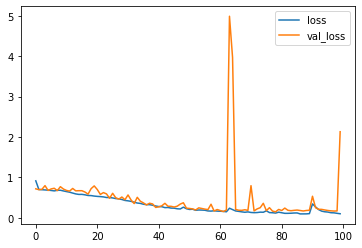

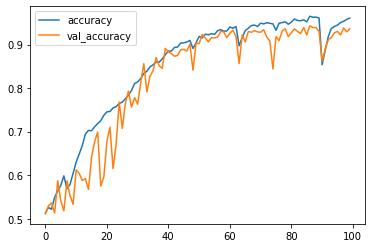

In [19]:
history_df.loc[:, ["loss", "val_loss"]].plot()
history_df.loc[:, ["accuracy", "val_accuracy"]].plot()

In [20]:
# 0 is cat, 1 is dog
y_pred = (model.predict(X_test) > 0.5).astype("int32")
pd.Series(y_pred.flatten()).value_counts()

0    1014
1    1009
dtype: int64

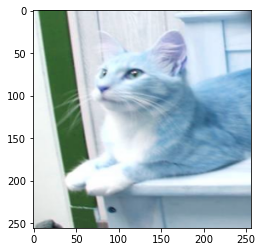

[0]


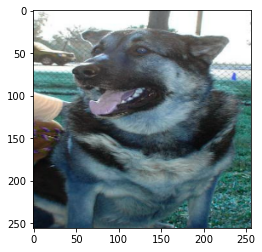

[1]


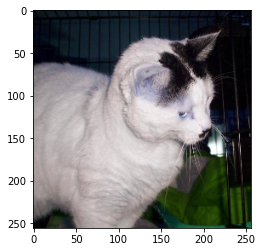

[0]


In [21]:
for i in [0, 10, 400]:
    plt.imshow(testing_data[i][0])
    plt.show()
    print(y_pred[i])

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1011
           1       0.95      0.95      0.95      1012

    accuracy                           0.95      2023
   macro avg       0.95      0.95      0.95      2023
weighted avg       0.95      0.95      0.95      2023



In [23]:
print(confusion_matrix(y_test, y_pred, labels = [0, 1]))

[[960  51]
 [ 54 958]]


In [24]:
accuracy_score(y_test, y_pred)

0.9480968858131488

The model acuracy on the validation set during training in the last few epochs was in the low 90%. So 94.8% accuracy on the testing set is in line with the accuracy whie training the model.